In [654]:
import numpy as np
import pandas as pd
# matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from google.cloud import bigquery
from bq_helper import BigQueryHelper
%load_ext google.cloud.bigquery
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="My Project-bbdce7b1712b.json"


The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [655]:
bq_assistant = BigQueryHelper("bigquery-public-data", "epa_historical_air_quality")

## We are only looking at SF Data
query="""
SELECT * FROM `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
where state_name ="California" AND city_name="San Francisco"
"""

df = bq_assistant.query_to_pandas(query)
##df=pd.read_csv('carbon-monoxide-results-20181007-145932.csv')

In [656]:
df.sample_duration.unique()

array(['1 HOUR', '8-HR RUN AVG END HOUR'], dtype=object)

Check the no of missing values in each column

In [657]:
df.isna().sum()

state_code                 0
county_code                0
site_num                   0
parameter_code             0
poc                        0
latitude                   0
longitude                  0
datum                      0
parameter_name             0
sample_duration            0
pollutant_standard         0
date_local                 0
units_of_measure           0
event_type                 0
observation_count          0
observation_percent        0
arithmetic_mean            0
first_max_value            0
first_max_hour             0
aqi                    16396
method_code            16398
method_name                0
local_site_name            0
address                    0
state_name                 0
county_name                0
city_name                  0
cbsa_name                  0
date_of_last_change        0
dtype: int64

# Data Preprocessing

Remove Missing values in aqi ( Dont Uncomment this)

In [658]:
# from sklearn.preprocessing import Imputer

# imp=Imputer(missing_values='NaN',strategy='mean')

# ## replace missing values in aqi and method code with mean
# df["aqi"]=imp.fit_transform(df[["aqi"]]).ravel()
# df["method_code"]=imp.fit_transform(df[["method_code"]]).ravel()


## Data Visualization ( for different years 1990-2017)

We will measure average aqi for different gases (CO,O3,NO2,SO2)

# Bar Graph for the average AQI over the years for the 4 gases

In [659]:
# For visualization
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral6, brewer
from bokeh.transform import factor_cmap


Avg Air Quality Index for CO over the years in San Francisco

In [660]:
QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        round(avg(aqi),2) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_co = bq_assistant.query_to_pandas(QUERY)

In [661]:
df_co.year = df_co.year.astype(str)

In [662]:
## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_CO_over_the_years.html')

source = ColumnDataSource(df_co)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Carbon monoxide in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Carbon monoxide"

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


Avg Air Quality Index for O3 over the years in San Francisco

In [663]:
QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        round(avg(aqi),2) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.o3_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_o3 = bq_assistant.query_to_pandas(QUERY)



In [664]:
df_o3.year = df_o3.year.astype(str)

In [665]:
## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_O3_over_the_years.html')

source = ColumnDataSource(df_o3)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Ozone in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Ozone"

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


Avg Air Quality Index for NO2 over the years in San Francisco

In [666]:
QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        round(avg(aqi),2) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.no2_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_no2 = bq_assistant.query_to_pandas(QUERY)



In [667]:
df_no2.year = df_no2.year.astype(str)

In [668]:
## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_no2_over_the_years.html')

source = ColumnDataSource(df_no2)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Nitrogen dioxide  in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Nitrogen dioxide "

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [669]:
##Avg Air Quality Index for SO2 over the years in San Francisco

QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        round(avg(aqi),2) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.so2_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_so2 = bq_assistant.query_to_pandas(QUERY)

df_so2.year = df_so2.year.astype(str)

## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_so2_over_the_years.html')

source = ColumnDataSource(df_so2)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Sulphur dioxide  in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Sulphur dioxide "

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


Avg Air Quality Index for Particulate Matter over the years in San Francisco

In [670]:
##Avg Air Quality Index for Particulate Matter over the years in San Francisco

QUERY = """
    SELECT
        EXTRACT(YEAR FROM date_local) as year,
        round(avg(aqi),2) as avg_aqi
    FROM
      `bigquery-public-data.epa_historical_air_quality.pm25_frm_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY year
    ORDER BY year ASC
        """
df_pm25 = bq_assistant.query_to_pandas(QUERY)

df_pm25.year = df_pm25.year.astype(str)

## Reference https://bokeh.pydata.org/en/latest/docs/user_guide/categorical.html
## Bar graph
output_file('average_aqi_pm25_over_the_years.html')

source = ColumnDataSource(df_pm25)
years = source.data['year'].tolist()
p = figure(x_range=years, plot_width=1200, plot_height=800)

color_map = factor_cmap(field_name='year', palette=Spectral6, factors=years)

p.vbar(x='year', top='avg_aqi', source=source, width=0.90)

p.title.text ='Average AQI of Particulate Matter in different years'
p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = "Average AQI of Particulate Matter"

show(p)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/bokeh/models/mappers.py:82: UserWarning: Palette length does not match number of factors. ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [671]:
## RENAME THE COLUMNS OF THE 4 DFS 
## https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
df_co.rename(columns={'avg_aqi': 'avg_aqi_CO'},inplace=True)
df_no2.rename(columns={'avg_aqi': 'avg_aqi_NO2'},inplace=True)
df_o3.rename(columns={'avg_aqi': 'avg_aqi_O3'},inplace=True)
df_so2.rename(columns={'avg_aqi': 'avg_aqi_SO2'},inplace=True)
df_pm25.rename(columns={'avg_aqi': 'avg_aqi_PM25'},inplace=True)

# Compare the Time Series Graphs of all the 5  

In [672]:
## Combine the dataframes ie all 3
from functools import reduce

## Reference: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
frames=[df_co,df_no2,df_o3]
df_final = reduce(lambda left,right: pd.merge(left,right,on='year'), frames)


In [673]:
df_final

,year,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3
0,1990,26.14,33.20,16.03
1,1991,25.52,36.59,16.88
2,1992,23.96,32.33,17.71
3,1993,21.40,34.21,17.42
4,1994,17.24,32.91,17.68
5,1995,16.33,32.30,22.51
6,1996,15.55,32.71,22.31
7,1997,13.96,30.38,20.47
8,1998,13.38,29.95,21.25
9,1999,13.87,32.11,22.16


In [674]:
colors = ['red', 'blue', 'green']
labels=['CARBON MONOXIDE','NITROGEN DIOXIDE','OZONE']

cols=df_final.columns.tolist()
cols.remove('year')

In [675]:
output_file('COMPARISON_AQI.html')

##https://www.geeksforgeeks.org/python-iterate-multiple-lists-simultaneously/
l = figure(title="COMPARISON OF AQI OF DIFFERENT GASES FROM 1990 TO 2017", logo=None,width=1000, height=500)

for color,label,col in zip(colors, labels, cols):
    source = ColumnDataSource(data=dict(x=df_final['year'].tolist(), y=df_final[col].tolist())) 
    l.line(x='x',y='y',source=source, legend=label, color=color,line_width=5)

source = ColumnDataSource(data=dict(x=df_so2['year'].tolist(), y=df_so2['avg_aqi_SO2'].tolist()))
l.line(x='x',y='y',source=source, legend='SULPHUR DIOXIDE', color="magenta",line_width=5)

source = ColumnDataSource(data=dict(x=df_pm25['year'].tolist(), y=df_pm25['avg_aqi_PM25'].tolist()))
l.line(x='x',y='y',source=source, legend='PARTICULATE MATTER', color="indigo",line_width=5)

l.xaxis.axis_label = 'YEAR'
l.yaxis.axis_label = "AVERAGE AQI"
l.title.text ='Comparison of AQI of CO,O3,NO2,SO2 AND PM'

l.legend.location = "top_right"
l.legend.click_policy="hide"

show(l)

DONT GO BEYOND THIS FOR NOW

In [676]:
result = pd.merge(df_final, df_so2, how='left', on='year')
df_merged = pd.merge(result, df_pm25, how='left', on='year')
df_merged

,year,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3,avg_aqi_SO2,avg_aqi_PM25
0,1990,26.14,33.20,16.03,6.43,NaN
1,1991,25.52,36.59,16.88,7.33,NaN
2,1992,23.96,32.33,17.71,7.45,NaN
3,1993,21.40,34.21,17.42,6.32,NaN
4,1994,17.24,32.91,17.68,3.52,NaN
5,1995,16.33,32.30,22.51,5.59,NaN
6,1996,15.55,32.71,22.31,4.88,NaN
7,1997,13.96,30.38,20.47,4.81,NaN
8,1998,13.38,29.95,21.25,4.08,NaN
9,1999,13.87,32.11,22.16,6.04,55.62


Impute missing values in so2 and pm25

In [677]:
from sklearn.preprocessing import Imputer

imp=Imputer(missing_values='NaN',strategy='mean')

## replace missing values in aqi and method code with mean
df_merged["avg_aqi_SO2"]=imp.fit_transform(df_merged[["avg_aqi_SO2"]]).ravel()
df_merged["avg_aqi_PM25"]=imp.fit_transform(df_merged[["avg_aqi_PM25"]]).ravel()


SF INCIDENTS DATABASE INCIDENTS PER YEAR

In [678]:
query_sf=""" SELECT EXTRACT(YEAR FROM timestamp) as year,count(distinct unique_key) as no_of_incidents
FROM `bigquery-public-data.san_francisco.sfpd_incidents`
group by year
order by year asc 
"""

df_sf_incidents = bq_assistant.query_to_pandas(query_sf)


In [679]:
df_sf_incidents.year = df_sf_incidents.year.astype(str)
df_combined = pd.merge(df_merged, df_sf_incidents, how='left', on='year')

In [680]:
df_combined

,year,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3,avg_aqi_SO2,avg_aqi_PM25,no_of_incidents
0,1990,26.14,33.20,16.03,6.430000,40.171053,NaN
1,1991,25.52,36.59,16.88,7.330000,40.171053,NaN
2,1992,23.96,32.33,17.71,7.450000,40.171053,NaN
3,1993,21.40,34.21,17.42,6.320000,40.171053,NaN
4,1994,17.24,32.91,17.68,3.520000,40.171053,NaN
5,1995,16.33,32.30,22.51,5.590000,40.171053,NaN
6,1996,15.55,32.71,22.31,4.880000,40.171053,NaN
7,1997,13.96,30.38,20.47,4.810000,40.171053,NaN
8,1998,13.38,29.95,21.25,4.080000,40.171053,NaN
9,1999,13.87,32.11,22.16,6.040000,55.620000,NaN


In [681]:
df_combined["no_of_incidents"]=imp.fit_transform(df_combined[["no_of_incidents"]]).ravel()

In [682]:
df_combined.dtypes

year                object
avg_aqi_CO         float64
avg_aqi_NO2        float64
avg_aqi_O3         float64
avg_aqi_SO2        float64
avg_aqi_PM25       float64
no_of_incidents    float64
dtype: object

Applying Regression

In [776]:

## Serialize df to a pickle object
## Skip every line above
import pickle

picle_out=open('df_merged_frame.pickle','wb')
pickle.dump(df_combined,picle_out)
picle_out.close()

In [777]:
## Deserialize the pickle object to get back the data frame
picle_in=open('df_merged_frame.pickle','rb')
df=pickle.load(picle_in)

In [778]:
## Deserialize the pickle object to get back the data frame
picle_in=open('population/dataframe.pickle','rb')
df_pop_per_yr=pickle.load(picle_in)

In [779]:
## Remove trailing zeroes
df_pop_per_yr['year'] = df_pop_per_yr['year'].astype(str).replace('\.0', '', regex=True)

In [780]:
df_comb = pd.merge(df, df_pop_per_yr, how='inner', on='year')

In [781]:
df_comb['Incidents_per_population']=df_comb['no_of_incidents']/df_comb['Population']

In [782]:
df_pop_per_yr.columns

Index(['year', 'Population'], dtype='object')

In [783]:
df_comb.drop(['no_of_incidents','Population'], axis=1,inplace=True)

In [784]:
df=df_comb

In [785]:
df.corr()

,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3,avg_aqi_SO2,avg_aqi_PM25,Incidents_per_population
avg_aqi_CO,1.000000,0.861288,-0.906427,0.438792,0.283537,0.751093
avg_aqi_NO2,0.861288,1.000000,-0.878082,0.267825,0.491036,0.632598
avg_aqi_O3,-0.906427,-0.878082,1.000000,-0.308821,-0.400453,-0.701513
avg_aqi_SO2,0.438792,0.267825,-0.308821,1.000000,0.200569,0.171394
avg_aqi_PM25,0.283537,0.491036,-0.400453,0.200569,1.000000,0.352231
Incidents_per_population,0.751093,0.632598,-0.701513,0.171394,0.352231,1.000000


In [786]:
# ## Optional Standard Scaling
# from sklearn.preprocessing import StandardScaler
# df[['avg_aqi_CO', 'avg_aqi_NO2','avg_aqi_O3','avg_aqi_SO2','avg_aqi_PM25']] = StandardScaler().fit_transform(df[['avg_aqi_CO', 'avg_aqi_NO2','avg_aqi_O3','avg_aqi_SO2','avg_aqi_PM25']])

In [787]:
## Optional MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
df[['avg_aqi_CO', 'avg_aqi_NO2','avg_aqi_O3','avg_aqi_SO2','avg_aqi_PM25']] = MinMaxScaler().fit_transform(df[['avg_aqi_CO', 'avg_aqi_NO2','avg_aqi_O3','avg_aqi_SO2','avg_aqi_PM25']])

In [788]:
df

,year,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3,avg_aqi_SO2,avg_aqi_PM25,Incidents_per_population
0,1990,1.000000,0.795783,0.000000,0.740458,0.397232,0.157640
1,1991,0.972627,1.000000,0.080113,0.969466,0.397232,0.156298
2,1992,0.903753,0.743373,0.158341,1.000000,0.397232,0.155202
3,1993,0.790728,0.856627,0.131008,0.712468,0.397232,0.154066
4,1994,0.607064,0.778313,0.155514,0.000000,0.397232,0.153643
5,1995,0.566887,0.741566,0.610745,0.526718,0.397232,0.152805
6,1996,0.532450,0.766265,0.591894,0.346056,0.397232,0.151275
7,1997,0.462252,0.625904,0.418473,0.328244,0.397232,0.149487
8,1998,0.436645,0.600000,0.491989,0.142494,0.397232,0.148069
9,1999,0.458278,0.730120,0.577757,0.641221,1.000000,0.147217


In [800]:
df_extra=pd.read_excel('population/SFCRIMERATE.xlsx')

Apply Imputation

In [801]:
df_extra[['Median age', 'Average household size', 'Average family size',
       'Median value owner occupied unit', 'Median household income',
       'Median family income', 'Per capita income', 'Crime Index']]=imp.fit_transform(df_extra[['Median age', 'Average household size', 'Average family size',
       'Median value owner occupied unit', 'Median household income',
       'Median family income', 'Per capita income', 'Crime Index']])

In [802]:
df_extra.Year=df_extra.Year.astype(str)

Apply Scaling

In [804]:
df_extra[['Median age', 'Average household size', 'Average family size',
       'Median value owner occupied unit', 'Median household income',
       'Median family income', 'Per capita income', 'Crime Index']] = MinMaxScaler().fit_transform(df_extra[['Median age', 'Average household size', 'Average family size',
       'Median value owner occupied unit', 'Median household income',
       'Median family income', 'Per capita income', 'Crime Index']])

In [805]:
df_extra[['Median age', 'Average household size', 'Average family size',
       'Median value owner occupied unit', 'Median household income',
       'Median family income', 'Per capita income', 'Crime Index']].round(2)

,Median age,Average household size,Average family size,Median value owner occupied unit,Median household income,Median family income,Per capita income,Crime Index
0,0.83,0.00,0.00,0.31,0.26,0.27,0.29,0.43
1,0.83,0.00,0.00,0.31,0.26,0.27,0.29,0.45
2,0.83,0.00,0.00,0.31,0.03,0.27,0.29,0.72
3,0.83,0.00,0.00,0.17,0.03,0.05,0.03,0.94
4,0.83,0.00,0.00,0.17,0.03,0.05,0.03,0.81
5,0.83,0.00,0.00,0.17,0.03,0.05,0.03,0.70
6,0.83,0.00,0.00,0.17,0.03,0.05,0.03,0.27
7,1.00,0.79,1.00,0.17,0.00,0.05,0.03,0.03
8,1.00,0.36,0.28,0.00,0.08,0.00,0.00,0.00
9,1.00,0.43,0.50,0.02,0.19,0.07,0.12,0.38


In [806]:
df[['avg_aqi_CO', 'avg_aqi_NO2', 'avg_aqi_O3', 'avg_aqi_SO2',
       'avg_aqi_PM25','Incidents_per_population']].round(2)

,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3,avg_aqi_SO2,avg_aqi_PM25,Incidents_per_population
0,1.00,0.80,0.00,0.74,0.40,0.16
1,0.97,1.00,0.08,0.97,0.40,0.16
2,0.90,0.74,0.16,1.00,0.40,0.16
3,0.79,0.86,0.13,0.71,0.40,0.15
4,0.61,0.78,0.16,0.00,0.40,0.15
5,0.57,0.74,0.61,0.53,0.40,0.15
6,0.53,0.77,0.59,0.35,0.40,0.15
7,0.46,0.63,0.42,0.33,0.40,0.15
8,0.44,0.60,0.49,0.14,0.40,0.15
9,0.46,0.73,0.58,0.64,1.00,0.15


In [807]:
dataframe_final=pd.merge(df, df_extra, how='inner', left_on='year',right_on='Year')

In [809]:
dataframe_final.drop(['year'],axis=1,inplace=True)

In [811]:
dataframe_final.columns

Index(['avg_aqi_CO', 'avg_aqi_NO2', 'avg_aqi_O3', 'avg_aqi_SO2',
       'avg_aqi_PM25', 'Incidents_per_population', 'Year', 'Median age',
       'Average household size', 'Average family size',
       'Median value owner occupied unit', 'Median household income',
       'Median family income', 'Per capita income', 'Crime Index'],
      dtype='object')

In [847]:
dataframe_final

,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3,avg_aqi_SO2,avg_aqi_PM25,Incidents_per_population,Year,Median age,Average household size,Average family size,Median value owner occupied unit,Median household income,Median family income,Per capita income,Crime Index
0,0.310375,0.514458,0.618285,0.646310,0.459618,0.155179,2003,0.833333,0.000000,0.000000,0.310109,0.264658,0.267960,0.289339,0.431246
1,0.206623,0.295181,0.644675,0.720102,0.486149,0.153992,2004,0.833333,0.000000,0.000000,0.310109,0.264658,0.267960,0.289339,0.445644
2,0.174393,0.228313,0.690858,0.241730,0.410066,0.152496,2005,0.833333,0.000000,0.000000,0.310109,0.034456,0.267960,0.289339,0.723542
3,0.192053,0.478313,0.711593,0.440204,0.372220,0.151927,2006,0.833333,0.000000,0.000000,0.170180,0.034456,0.046914,0.029098,0.944564
4,0.143488,0.389157,0.648445,0.066158,0.299259,0.145087,2007,0.833333,0.000000,0.000000,0.170180,0.034456,0.046914,0.029098,0.813535
5,0.137307,0.423494,0.782281,0.129771,0.332423,0.146206,2008,0.833333,0.000000,0.000000,0.170180,0.034456,0.046914,0.029098,0.701224
6,0.069757,0.352410,0.822809,0.497522,0.551697,0.136168,2009,0.833333,0.000000,0.000000,0.170180,0.034456,0.046914,0.029098,0.273578
7,0.000000,0.330120,0.758718,0.497522,0.413968,0.126723,2010,1.000000,0.785714,1.000000,0.170180,0.000000,0.046914,0.029098,0.034557
8,0.025607,0.523494,0.716305,0.497522,0.260632,0.124420,2011,1.000000,0.357143,0.277778,0.000000,0.076194,0.000000,0.000000,0.000000
9,0.101104,0.245181,1.000000,0.497522,0.093640,0.131246,2012,1.000000,0.428571,0.500000,0.020297,0.185499,0.065781,0.120303,0.380130


In [887]:
dataframe_final.corr()

,avg_aqi_CO,avg_aqi_NO2,avg_aqi_O3,avg_aqi_SO2,avg_aqi_PM25,Incidents_per_population,Median age,Average household size,Average family size,Median value owner occupied unit,Median household income,Median family income,Per capita income,Crime Index
avg_aqi_CO,1.000000,0.285372,-0.485431,0.081525,0.326235,0.912750,-0.038015,-0.587490,-0.615223,0.047448,-0.052138,0.017869,0.020360,0.359011
avg_aqi_NO2,0.285372,1.000000,-0.755896,-0.120456,0.611437,0.218195,0.630307,-0.683808,-0.234038,-0.713751,-0.728819,-0.767563,-0.786072,-0.283998
avg_aqi_O3,-0.485431,-0.755896,1.000000,0.136364,-0.754720,-0.520091,-0.455208,0.770938,0.434300,0.519494,0.599550,0.572375,0.605891,0.136191
avg_aqi_SO2,0.081525,-0.120456,0.136364,1.000000,0.033926,-0.103722,-0.049859,0.279641,0.221777,0.176664,0.341275,0.258340,0.286875,-0.336566
avg_aqi_PM25,0.326235,0.611437,-0.754720,0.033926,1.000000,0.385090,0.390569,-0.651695,-0.371090,-0.341249,-0.718864,-0.418471,-0.473130,-0.309004
Incidents_per_population,0.912750,0.218195,-0.520091,-0.103722,0.385090,1.000000,-0.037307,-0.640929,-0.623999,0.054512,-0.108711,-0.028879,-0.025145,0.511967
Median age,-0.038015,0.630307,-0.455208,-0.049859,0.390569,-0.037307,1.000000,-0.420146,0.200727,-0.822146,-0.708268,-0.777726,-0.772980,-0.249998
Average household size,-0.587490,-0.683808,0.770938,0.279641,-0.651695,-0.640929,-0.420146,1.000000,0.703010,0.613427,0.579039,0.659858,0.676390,-0.067936
Average family size,-0.615223,-0.234038,0.434300,0.221777,-0.371090,-0.623999,0.200727,0.703010,1.000000,0.003771,0.098629,0.007401,0.054022,-0.301575
Median value owner occupied unit,0.047448,-0.713751,0.519494,0.176664,-0.341249,0.054512,-0.822146,0.613427,0.003771,1.000000,0.618483,0.968501,0.947558,0.263368


In [952]:
cols=['avg_aqi_CO', 'avg_aqi_NO2', 'avg_aqi_O3',
       'avg_aqi_PM25','Year', 'Median age',
       'Average household size', 'Average family size',
       'Median value owner occupied unit', 'Median household income',
       'Median family income', 'Per capita income']

In [953]:
X=dataframe_final[cols]

In [954]:
Y=dataframe_final['Crime Index']

In [955]:
X.shape

(15, 12)

In [956]:
Y.shape

(15,)

In [957]:
import statsmodels.api as sm


# Note the difference in argument order
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [958]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

predictions = lm.predict(X)
print('Accuracy of model=',lm.score(X,Y))


Accuracy of model= 0.9576376816389964


In [959]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(10, 12) (10,)
(5, 12) (5,)


In [960]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)



Text(0,0.5,'Predictions')

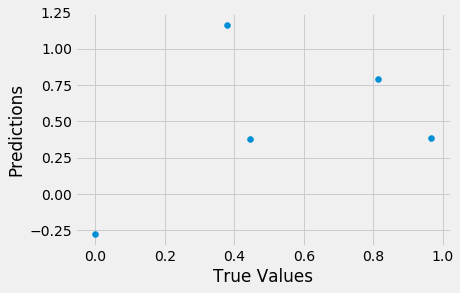

In [961]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [962]:
## R2 score Evaluation
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

from sklearn.metrics import r2_score
from sklearn import metrics

print("r2 train: %.3f, test : %.3f" %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred) ))

print('Rmse VAlue is:')
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

r2 train: 1.000, test : -0.770
Rmse VAlue is:
0.45395015634593316


In [963]:
## Reference https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [964]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# LASSO Regression

In [965]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

# Elastic Net Regression

In [966]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))


# Kernel Ridge Regression

In [967]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


# Gradient Boosting Regression

In [968]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

# XGBoost

In [969]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

# Model Evaluation Scores

In [970]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.7882 (0.3199)



/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

In [971]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet score: 0.7833 (0.3150)



/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [972]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 1.1043 (0.5865)



In [973]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.3265 (0.1517)



In [974]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.3708 (0.1460)



Useless Stuff after this

In [975]:
columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True)


In [976]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [980]:
# ### Splitting
# x_train, x_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.1, random_state=200)
# x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(train_features_st, train_labels, test_size=0.1, random_state=200)

In [981]:
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)
train_test(ENSTest,X_train, X_test, y_train, y_test)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: -6.312143500042912e+30
RMSE: 0.2789322060143148
Test
R2: 0.0
RMSE: 0.35083724664546284


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [982]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(ENSTest, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

Accuracy: -6.92 (+/- 18.13)


/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/nikhileshchaudhary/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

In [983]:
from sklearn import ensemble
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)
train_test(GBest, X_train, X_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.0
RMSE: 0.2795644081790625
Test
R2: 0.0
RMSE: 0.35568699987457725


In [984]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest,  X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -7.03 (+/- 18.23)
